In [5]:
library(ggplot2)
library(readr)

flight_data <- read_csv("Clean_Dataset.csv")

head(flight_data)

New names:
• `` -> `...1`
Rows: 300153 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): airline, flight, source_city, departure_time, stops, arrival_time, ...
dbl (4): ...1, duration, days_left, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955


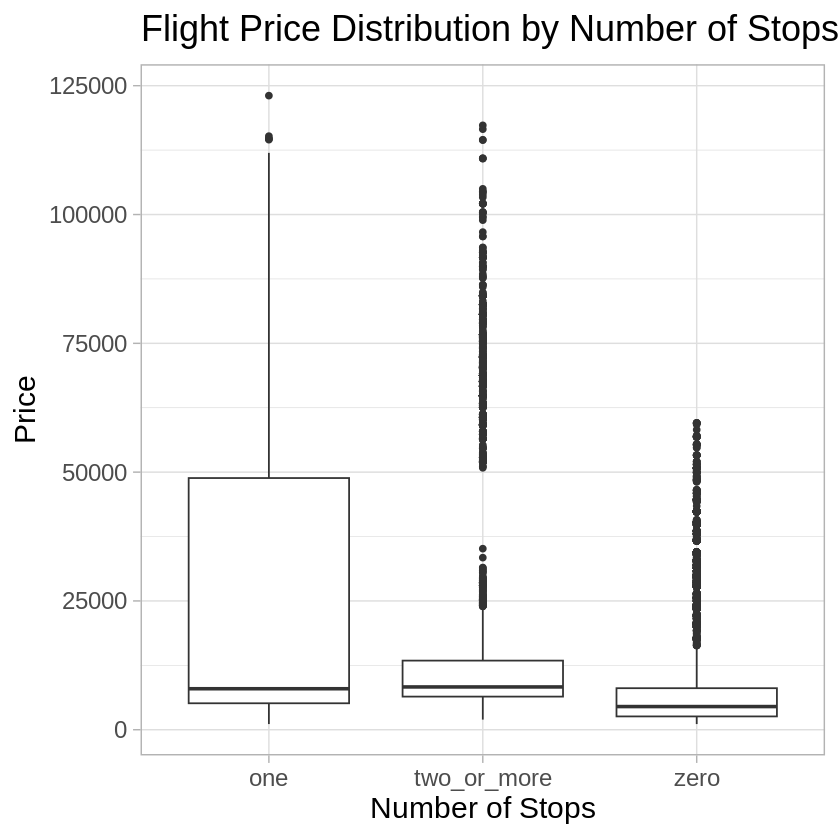

In [6]:
flight_data$stops <- as.factor(flight_data$stops)

ggplot(flight_data, aes(x=stops, y=price)) +
  geom_boxplot() +
  labs(title="Flight Price Distribution by Number of Stops",
       x="Number of Stops",
       y="Price") +
  theme_light(base_size = 18) 

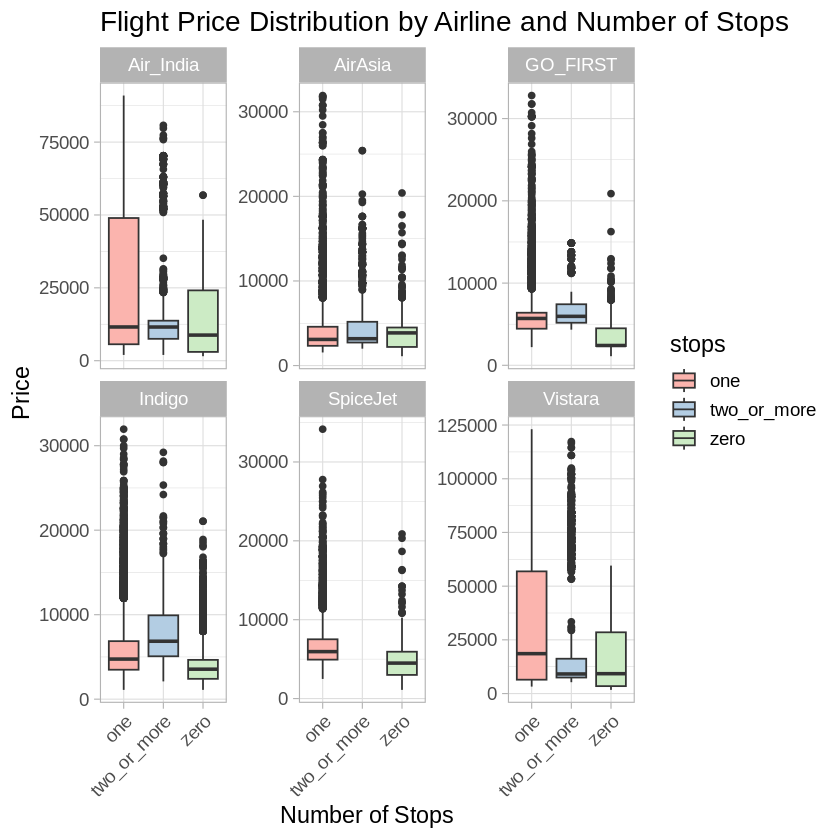

In [7]:
flight_data$stops <- as.factor(flight_data$stops)
flight_data$airline <- as.factor(flight_data$airline)

ggplot(flight_data, aes(x=stops, y=price, fill=stops)) +
  geom_boxplot() +
  facet_wrap(~airline, scales = "free_y") + # Faceting by airline
  labs(title="Flight Price Distribution by Airline and Number of Stops",
       x="Number of Stops",
       y="Price") +
  theme_light(base_size = 14) +  # Use suitable font size
  scale_fill_brewer(palette="Pastel1") +  # Show colorful stop signs
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels


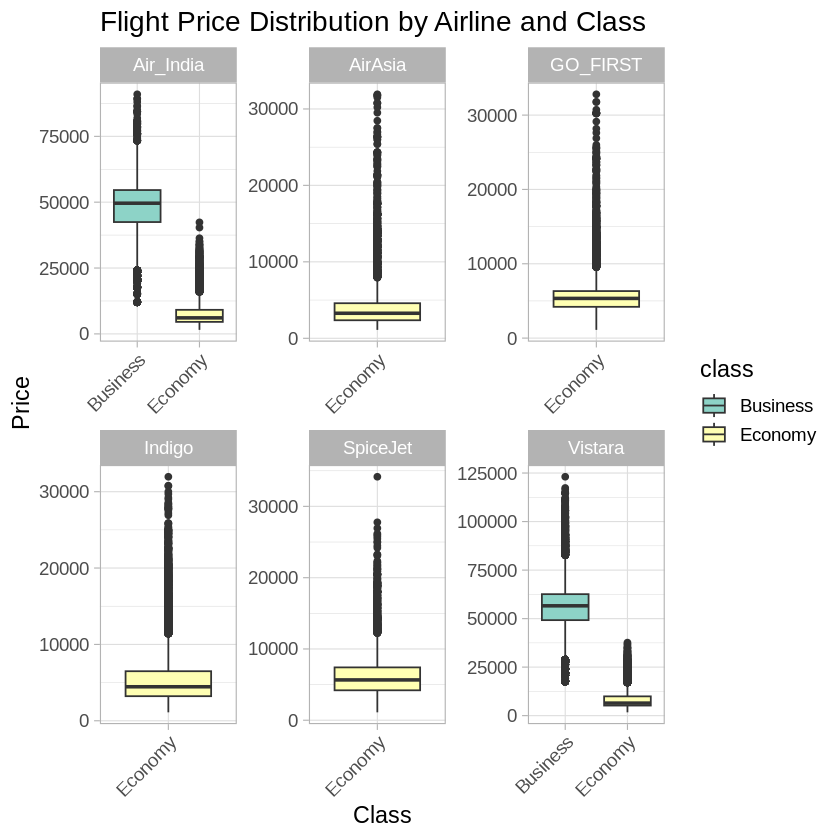

In [4]:
flight_data$airline <- as.factor(flight_data$airline)
flight_data$class <- as.factor(flight_data$class)

ggplot(flight_data, aes(x=class, y=price, fill=class)) +
  geom_boxplot() +
  facet_wrap(~airline, scales = "free") +  # Faceting by airline
  labs(title="Flight Price Distribution by Airline and Class",
       x="Class",
       y="Price") +
  theme_light(base_size = 14) +  # Use suitable font size
  scale_fill_brewer(palette="Set3") + # Show colorful stop signs
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels

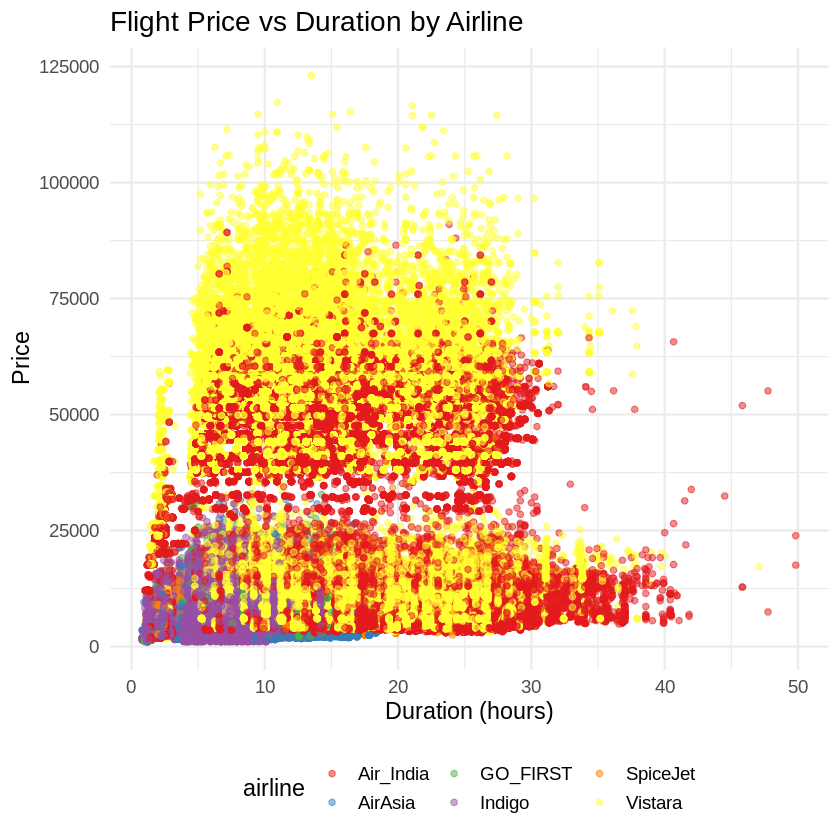

In [5]:
flight_data$airline <- as.factor(flight_data$airline)

# Generate the scatter plot
ggplot(flight_data, aes(x=duration, y=price, color=airline)) +
  geom_point(alpha=0.5) +  # Set transparency to see overlapping points
  labs(title="Flight Price vs Duration by Airline",
       x="Duration (hours)",
       y="Price") +
  theme_minimal(base_size = 14) +  # Use a minimal theme with a reasonable base text size
  scale_color_brewer(palette="Set1") +  # Color points by airline
  theme(legend.position="bottom")  # Move the legend to the bottom

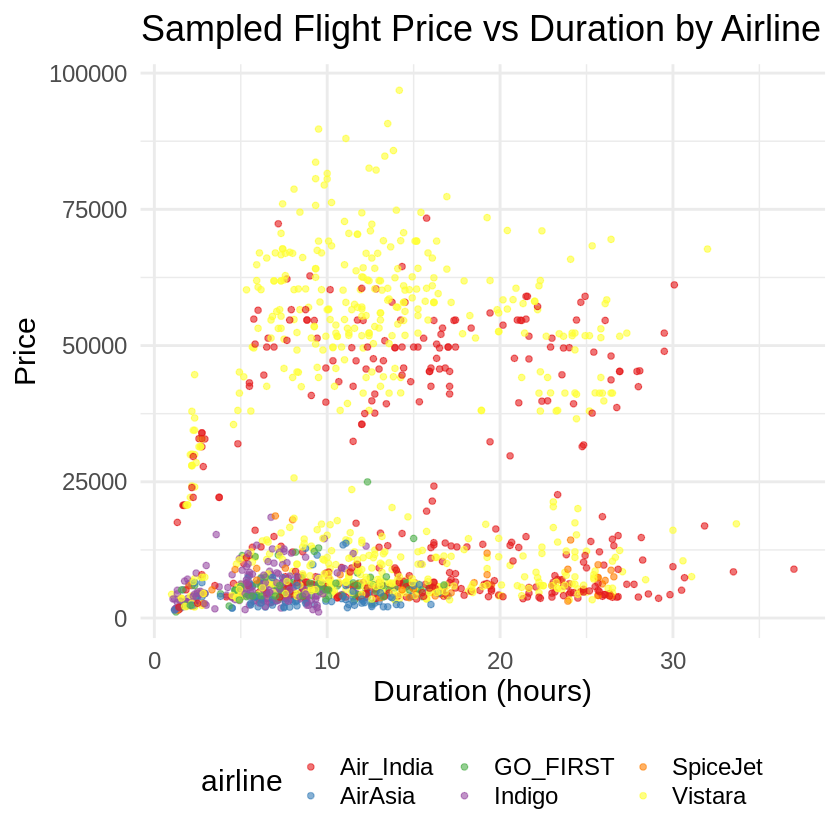

In [6]:
set.seed(123)

# Sample 0.5% of the data
sample_size <- round(0.005 * nrow(flight_data))

sampled_data <- flight_data[sample(nrow(flight_data), sample_size),]

sampled_data$airline <- as.factor(sampled_data$airline)

ggplot(sampled_data, aes(x=duration, y=price, color=airline)) +
  geom_point(alpha=0.6) +  # Adjust transparency 
  labs(title="Sampled Flight Price vs Duration by Airline",
       x="Duration (hours)",
       y="Price") +
  theme_minimal(base_size = 18) +  # Use a suitable font size
  scale_color_brewer(palette="Set1") +  # Color points by airline
  theme(legend.position="bottom")  # Move the legend to the bottom


`summarise()` has grouped output by 'source_city'. You can override using the
`.groups` argument.


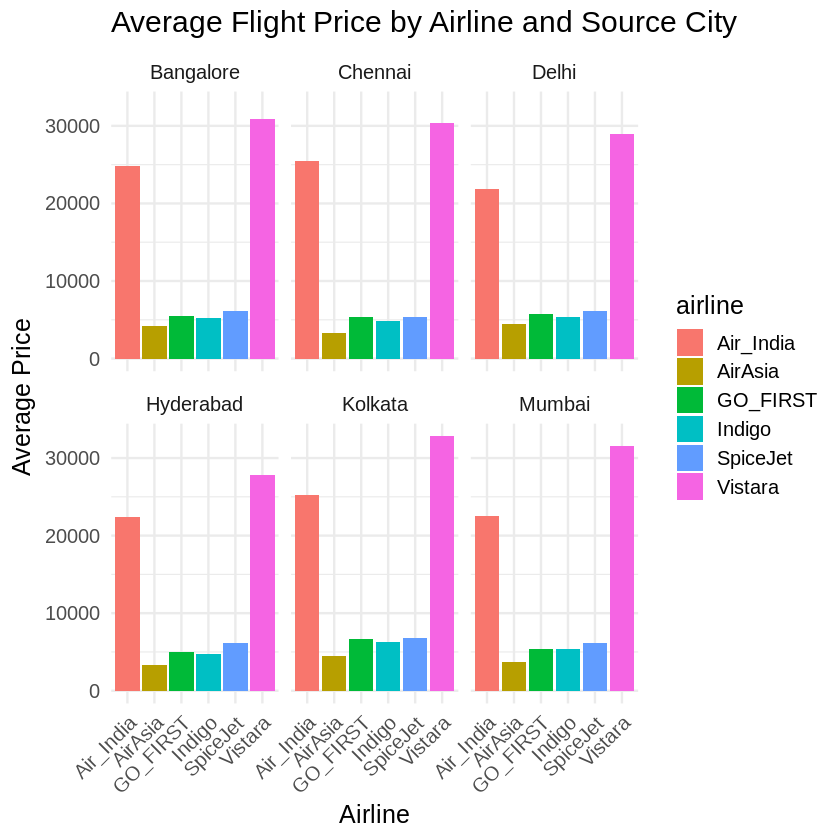

In [10]:
# group the data and calculate the average price
avg_price_data <- flight_data %>%
  group_by(source_city, airline) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))

# Generate the grouped bar plot
ggplot(avg_price_data, aes(x=airline, y=avg_price, fill=airline)) +
  geom_bar(stat="identity", position=position_dodge()) +
  facet_wrap(~source_city) +  # Faceting by source city
  labs(title="Average Flight Price by Airline and Source City",
       x="Airline",
       y="Average Price") +
  theme_minimal(base_size = 15) + 
  theme(axis.text.x = element_text(angle=45, hjust=1))  # Rotate x-axis 

`summarise()` has grouped output by 'destination_city'. You can override using
the `.groups` argument.


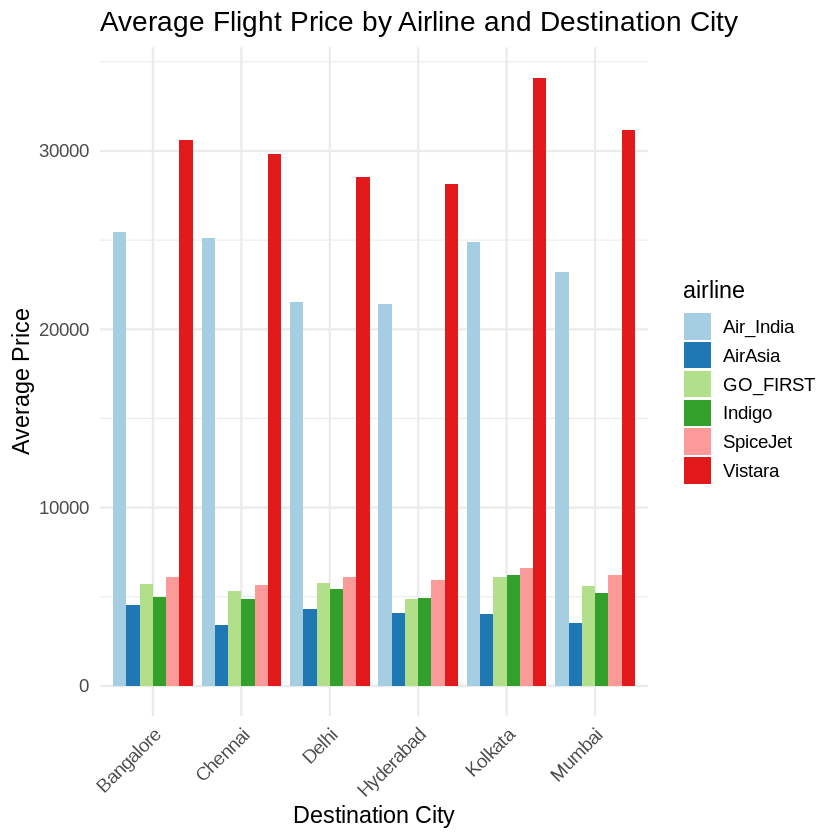

In [13]:
flight_data$destination_city <- as.factor(flight_data$destination_city)
flight_data$airline <- as.factor(flight_data$airline)

# get the average price per airline per destination city
avg_price_data <- flight_data %>%
  group_by(destination_city, airline) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))

ggplot(avg_price_data, aes(x=destination_city, y=avg_price, fill=airline)) +
  geom_bar(stat="identity", position=position_dodge()) +
  labs(title="Average Flight Price by Airline and Destination City",
       x="Destination City",
       y="Average Price") +
  scale_fill_brewer(palette="Paired") +  
  theme_minimal(base_size = 14) +   
  theme(axis.text.x = element_text(angle=45, hjust=1)) 

`summarise()` has grouped output by 'destination_city'. You can override using
the `.groups` argument.


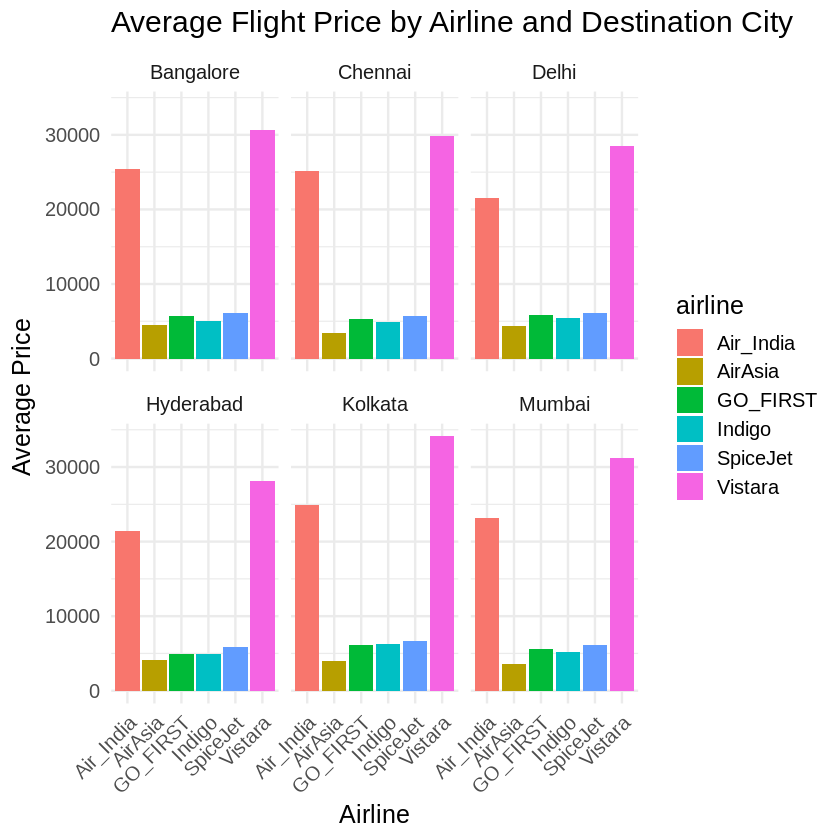

In [14]:
# group the data and calculate the average price
avg_price_data <- flight_data %>%
  group_by(destination_city, airline) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))

# Generate the grouped bar plot
ggplot(avg_price_data, aes(x=airline, y=avg_price, fill=airline)) +
  geom_bar(stat="identity", position=position_dodge()) +
  facet_wrap(~destination_city) +  # Faceting by destination city
  labs(title="Average Flight Price by Airline and Destination City",
       x="Airline",
       y="Average Price") +
  theme_minimal(base_size = 15) + 
  theme(axis.text.x = element_text(angle=45, hjust=1))  # Rotate x-axis 

`summarise()` has grouped output by 'departure_time'. You can override using
the `.groups` argument.


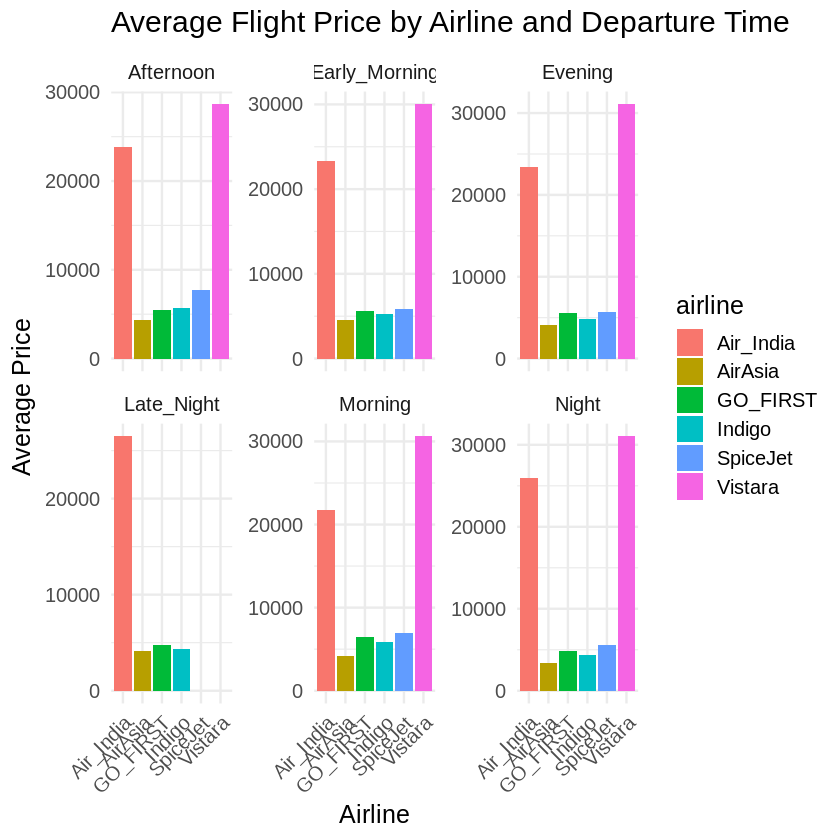

In [11]:
flight_data$departure_time <- as.factor(flight_data$departure_time)
flight_data$airline <- as.factor(flight_data$airline)

# get the average price per airline per departure time
avg_price_data <- flight_data %>%
  group_by(departure_time, airline) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))

ggplot(avg_price_data, aes(x=airline, y=avg_price, fill=airline)) +
  geom_bar(stat="identity", position=position_dodge()) +
  facet_wrap(~departure_time, scales = "free_y") +  # Faceting by departure time
  labs(title="Average Flight Price by Airline and Departure Time",
       x="Airline",
       y="Average Price") +
  theme_minimal(base_size = 15) + 
  theme(axis.text.x = element_text(angle=45, hjust=1))

`summarise()` has grouped output by 'arrival_time'. You can override using the
`.groups` argument.


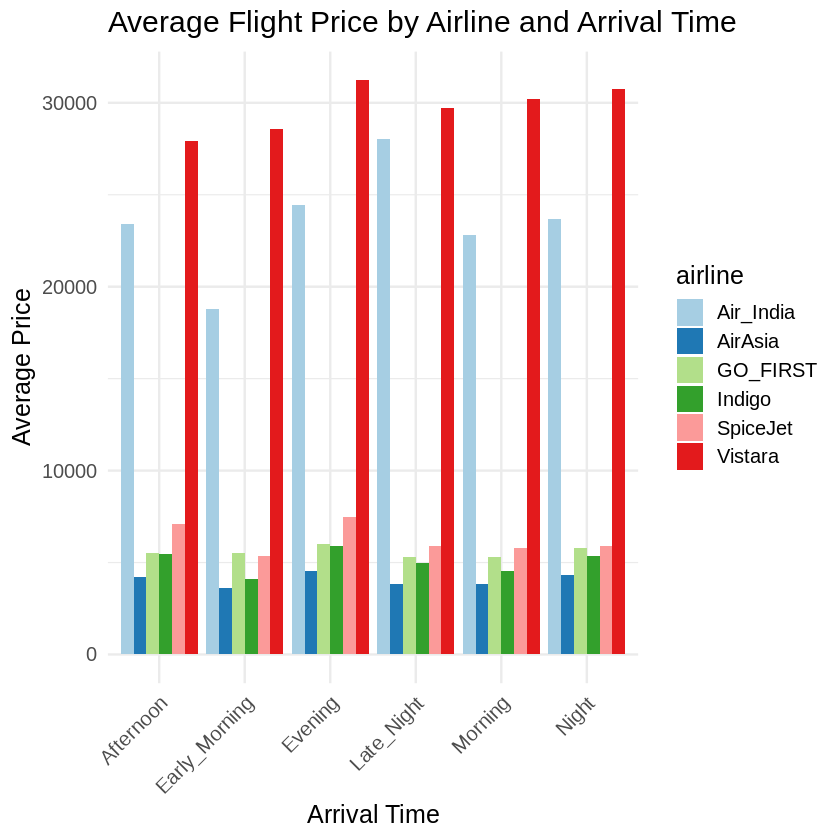

In [15]:
flight_data$arrival_time <- as.factor(flight_data$arrival_time)
flight_data$airline <- as.factor(flight_data$airline)

# get the average price per airline per arrival time
avg_price_data <- flight_data %>%
  group_by(arrival_time, airline) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))

ggplot(avg_price_data, aes(x=arrival_time, y=avg_price, fill=airline)) +
  geom_bar(stat="identity", position=position_dodge()) +
  labs(title="Average Flight Price by Airline and Arrival Time",
       x="Arrival Time",
       y="Average Price") +
  scale_fill_brewer(palette="Paired") +  # colorful categorical data
  theme_minimal(base_size = 15) + 
  theme(axis.text.x = element_text(angle=45, hjust=1))  


`summarise()` has grouped output by 'arrival_time'. You can override using the
`.groups` argument.


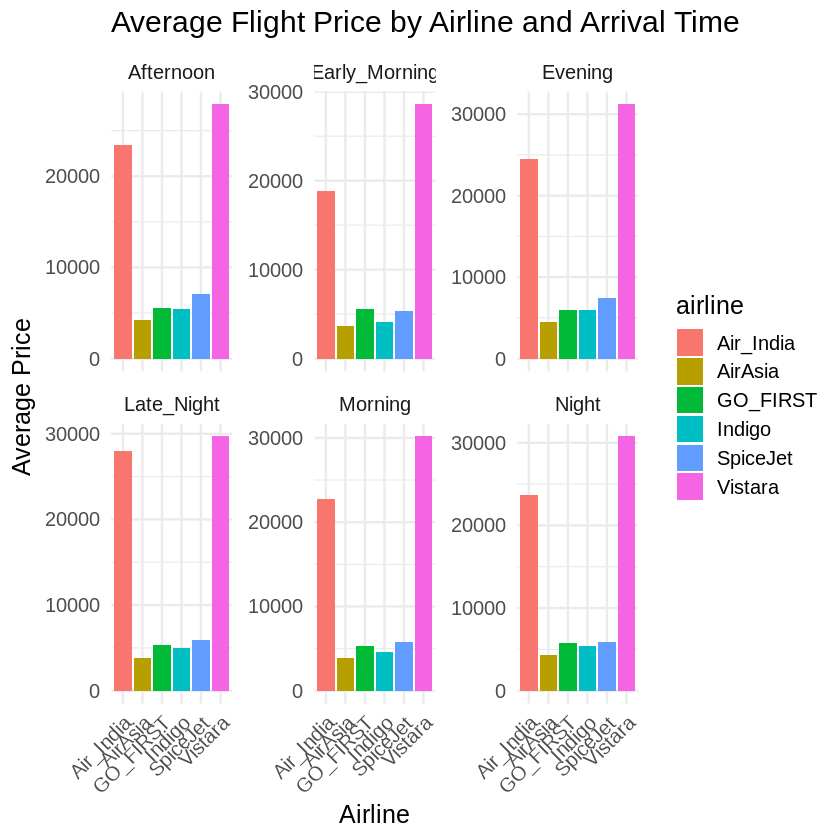

In [16]:
flight_data$arrival_time <- as.factor(flight_data$arrival_time)
flight_data$airline <- as.factor(flight_data$airline)

# get the average price per airline per departure time
avg_price_data <- flight_data %>%
  group_by(arrival_time, airline) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))

ggplot(avg_price_data, aes(x=airline, y=avg_price, fill=airline)) +
  geom_bar(stat="identity", position=position_dodge()) +
  facet_wrap(~arrival_time, scales = "free_y") +  # Faceting by arrival time
  labs(title="Average Flight Price by Airline and Arrival Time",
       x="Airline",
       y="Average Price") +
  theme_minimal(base_size = 15) + 
  theme(axis.text.x = element_text(angle=45, hjust=1))

`geom_smooth()` using formula = 'y ~ x'


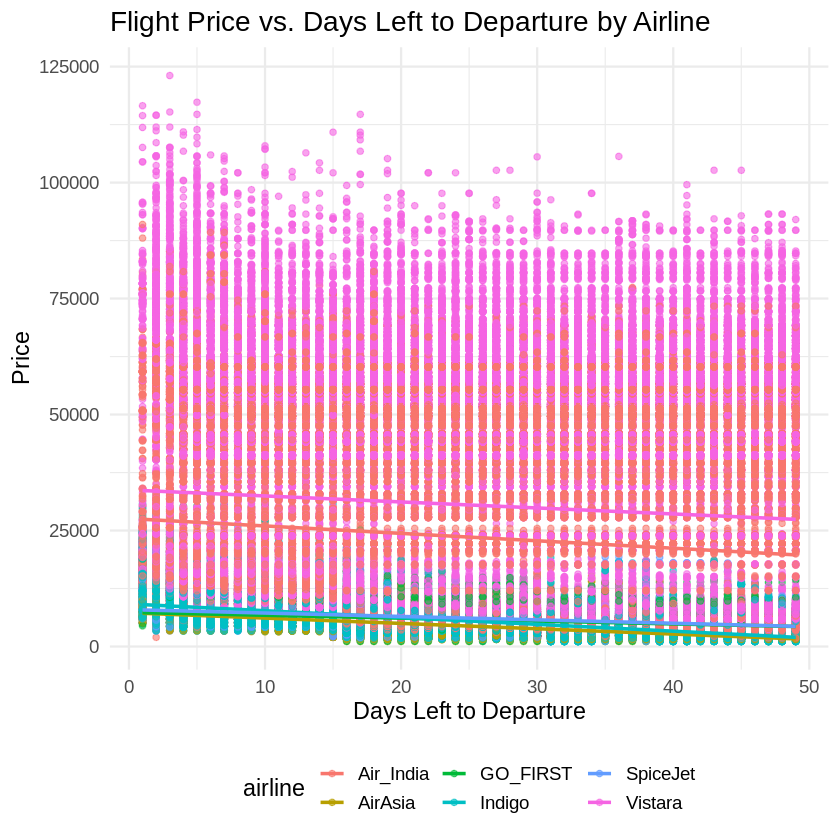

In [3]:
flight_data$airline <- as.factor(flight_data$airline)

# Generate the scatter plot with trend lines
ggplot(flight_data, aes(x=days_left, y=price, color=airline)) +
  geom_point(alpha=0.6) +  # Add scatter points with some transparency
  geom_smooth(method = "lm", se = FALSE) +  # Add linear trend lines without confidence intervals
  labs(title = "Flight Price vs. Days Left to Departure by Airline",
       x = "Days Left to Departure",
       y = "Price") +
  theme_minimal(base_size = 14) +  # Use a minimal theme
  theme(legend.position = "bottom")

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'days_left'. You can override using the
`.groups` argument.


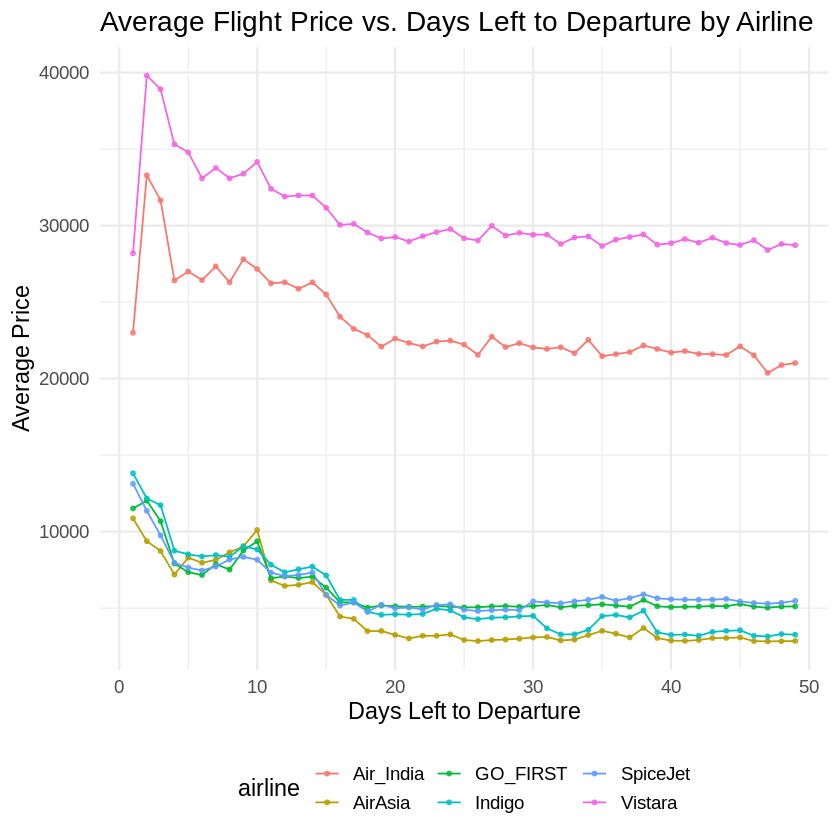

In [9]:
library(ggplot2)
library(dplyr)
flight_data$airline <- as.factor(flight_data$airline)

# Summarize the data to get the average price per airline for each 'days_left'
avg_price_data <- flight_data %>%
  group_by(days_left, airline) %>%
  summarise(avg_price = mean(price, na.rm = TRUE)) %>%
  ungroup()  # Ungroup the data for plotting

# Generate the line plot with averages
ggplot(avg_price_data, aes(x=days_left, y=avg_price, group=airline, color=airline)) +
  geom_line() +  # Use line geom for average trends
  geom_point(size=1, alpha=0.8) +  # Optionally add points to indicate the actual averages
  labs(title = "Average Flight Price vs. Days Left to Departure by Airline",
       x = "Days Left to Departure",
       y = "Average Price") +
  theme_minimal(base_size = 14) +  # Use a minimal theme
  theme(legend.position = "bottom")